# Bar Chart
Use Bar Chart to compare different categories of data.
(ex: compare salaries of different job titles, compare the number of people who own a car vs bike vs motorcycle, etc)

In [6]:
from matplotlib import pyplot as plt # import pyplot from matplotlib
import numpy as np

In [7]:
plt.style.use("seaborn-v0_8-paper") # set style to xkcd

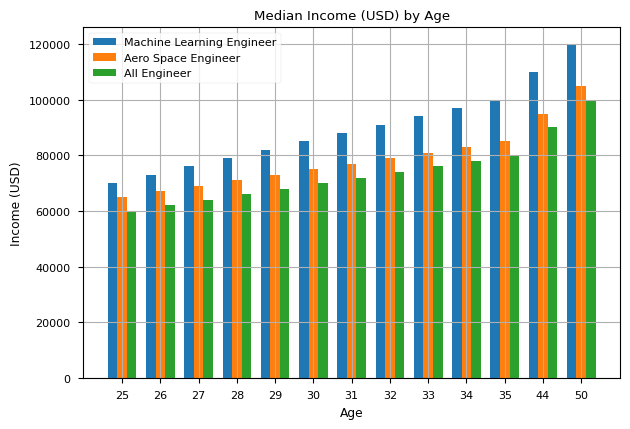

In [8]:
age_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 44, 50]

# All Engineers Salary by Age
eng_y = [60000, 62000, 64000, 66000, 68000, 70000, 72000, 74000, 76000, 78000, 80000, 90000, 100000]

# Machine Learning Engineer Salary by Age
ml_eng_y = [70000, 73000, 76000, 79000, 82000, 85000, 88000, 91000, 94000, 97000, 100000, 110000, 120000]

# Aero Space Engineer Salary by Age
as_eng_y = [65000, 67000, 69000, 71000, 73000, 75000, 77000, 79000, 81000, 83000, 85000, 95000, 105000]

#! Make each bar align side by side for each "age" (not stacked)
#? First we normalize the width of each bar following age index (since we want 3 bars each age)
#? Then we replace x_indexes to age_x (to normalize) and shift the bar to the left or right to align them side by side
#? Now the x-axis are in range 0 to 12. We use plt.xticks(ticks=x_indexes, labels=age_x) to replace the x-axis index numbers with age_x value

x_indexes = np.arange(len(age_x))
bar_width = 0.25

# convert x value into x_indexes to normalize the width of the bar
plt.bar(x_indexes - bar_width, ml_eng_y, width=bar_width,label='Machine Learning Engineer') 
plt.bar(x_indexes, as_eng_y, width=bar_width, label='Aero Space Engineer')
plt.bar(x_indexes + bar_width, eng_y, width=bar_width, linestyle='--',label='All Engineer') 

plt.xlabel("Age")
plt.ylabel("Income (USD)")
plt.title("Median Income (USD) by Age")
plt.legend() # Display labels for each line
plt.tight_layout() # Adjust the padding
plt.grid(True) # Display grid
plt.xticks(ticks=x_indexes, labels=age_x)

plt.show()

### Counter Over View

Counter(dictionary) # count the value in the dict


plt.barh(x, y) # plotting horizontal bar chart. Use when label name are too long 

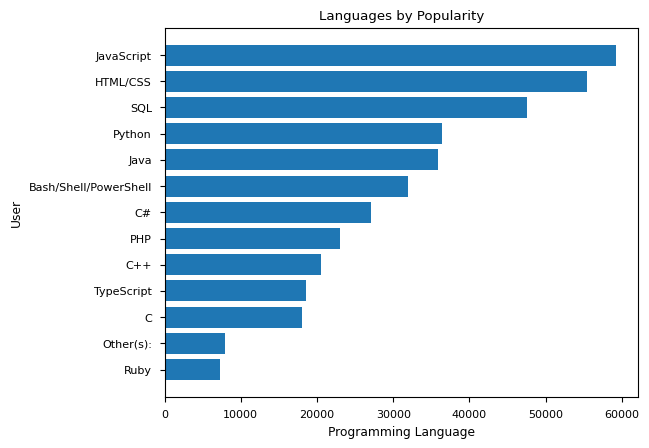

In [9]:
import csv 
from collections import Counter # keep count of value in dict

# csv module from standard library
with open("data/data.csv") as csv_file:
    csv_reader = csv.DictReader(csv_file)
        
    row = next(csv_reader)
    langCounter = Counter() # initiate Counter dictionary format
    
    # Counter all languages in the csv file
    for row in csv_reader:
        langCounter.update(row["LanguagesWorkedWith"].split(";")) # add languages of each line and count each updated.
    
languages = []
popularity = []

for item in langCounter.most_common(13):
    languages.append(item[0])
    popularity.append(item[1])
    
languages.reverse()
popularity.reverse()

plt.title("Languages by Popularity")
plt.barh(languages, popularity) # barh for "horizonal bar chart"
plt.tight_layout()
plt.xlabel("Programming Language")
plt.ylabel("User")
plt.show()

# Use Panda to plot Data since it faster and cleaner

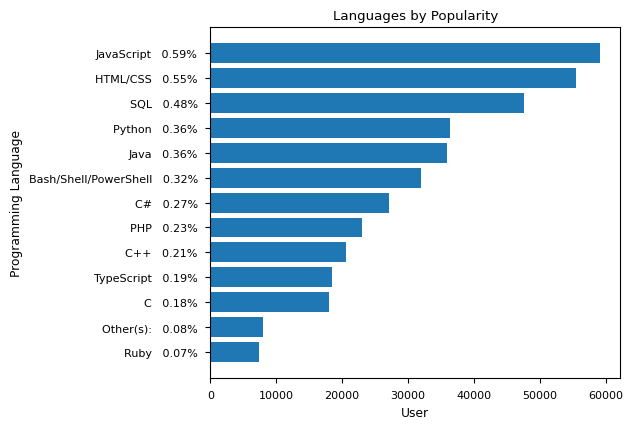

In [10]:
import pandas as pd
from collections import Counter # keep count of value in dict

# csv module from standard library
data = pd.read_csv('data/data.csv') # read csv in table format (display row and col) 
ids = data["Responder_id"]
langResponse = data["LanguagesWorkedWith"] # Pandas Series Datatype Ex: 1;2;3;4
type(langResponse)

langCounter = Counter() # initiate Counter dictionary format

# Counter all languages in the csv file
for response in langResponse:
    # split each value by ; to a dictionary for Counter() to count
    langCounter.update(response.split(";"))
    
    
languages = []
popularity = []

most_common_lang = langCounter.most_common(13)

for item in most_common_lang:
    languages.append(item[0])
    popularity.append(item[1])

languages.reverse()
popularity.reverse()

total_responses = 100000 # assume the total user is 100000
languages_percent = [
    f'{lang}   {popularity[i]/total_responses:.2f}%'
    for i, lang in enumerate(languages)
]
# print(languages_percent)

plt.title("Languages by Popularity")
plt.barh(languages_percent, popularity) # barh for "horizonal bar chart"
plt.xlabel("User")
plt.ylabel(f"Programming Language")
plt.tight_layout()

plt.show()

# Practice

['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java', 'Bash/Shell/PowerShell', 'C#', 'PHP', 'C++', 'TypeScript', 'C', 'Other(s):', 'Ruby', 'Go', 'Assembly']
[59219, 55466, 47544, 36443, 35917, 31991, 27097, 23030, 20524, 18523, 18017, 7920, 7331, 7201, 5833]


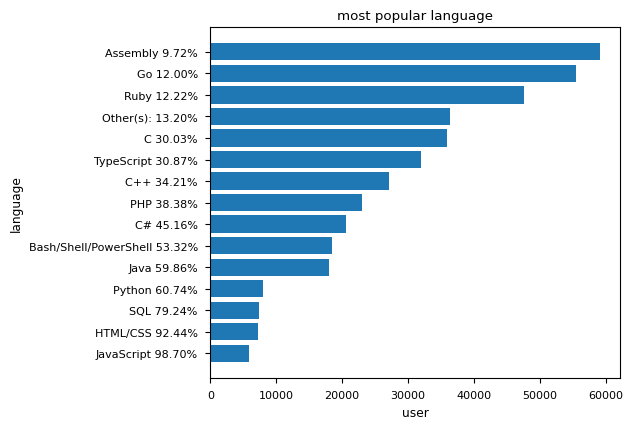

In [11]:
import pandas as pd
from collections import Counter

#? pandas data display in series and split by ;
data = pd.read_csv('data/data.csv') 
lang_responses = data['LanguagesWorkedWith'] 

langCounter = Counter() # initial Counter Dictionary to count value within Dict 
for response in lang_responses:
    langCounter.update(response.split(";")) # Count Language after update new languages to langCounter 

languages = []
popularity = []

common_lang = langCounter.most_common(15)

for response in common_lang:
    # print(response)
    languages.append(response[0])
    popularity.append(response[1])

print(languages)
print(popularity)
total_lang = 60000

# to figure this out, ask question like how can I connect/relate language and popularity
languages_percent = [ 
    f'{lang} {popularity[i]/total_lang *100:.2f}%'
    for i, lang in enumerate(languages)
] 

languages.reverse()
popularity.reverse()

plt.title("most popular language")
plt.barh(languages_percent, popularity)
plt.xlabel("user")
plt.ylabel("language")
plt.tight_layout()
plt.show()